In [2]:
#import libraries
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score





# Set display options
pd.set_option('display.max_columns', None)  # None means unlimited
pd.set_option('display.max_rows', None)  # None means unlimited
warnings.simplefilter(action="ignore", category=FutureWarning)
pd.set_option('display.float_format', lambda x: "%.5f" %x)

In [3]:
def wrangle(filepath):
    # Read csv file into dataframe
    df = pd.read_csv(filepath)
    
    # Remove duplicated values
    df.drop_duplicates(subset="id", inplace=True)
    
    # Convert date to datetime and split
    df["date"] = pd.to_datetime(df["date"])
    df["year"] = df["date"].dt.year
    df["month"] = df["date"].dt.month
    df["day"] = df["date"].dt.day


    #convert zipcode to str
    df["zipcode"] = df["zipcode"].astype("category")
    
    # Drop date and id column
    df.drop(["date", "id"], axis=1, inplace=True)

    # Drop multicolinear variables
    df.drop(["sqft_above", "sqft_basement"], axis=1, inplace=True)

    #subset price where "price_aprox_usd" < 400_000
    # mask_price = df["price"] < 1_000_000

    # df = df[mask_price]
    
    
    # Add other data wrangling steps here if needed
    
    return df


In [4]:
df = wrangle(r"C:\Users\eakli\Downloads\task\ecole\house-pricing-prediction\apartment-hunter\data\raw\kc_house_data.csv")

<Axes: xlabel='bedrooms', ylabel='price'>

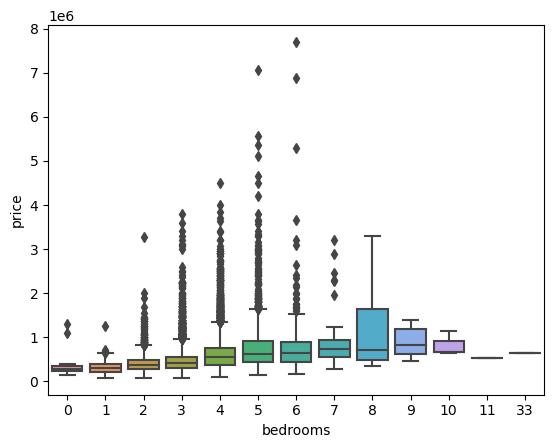

In [5]:
sns.boxplot(data=df, x='bedrooms', y='price')

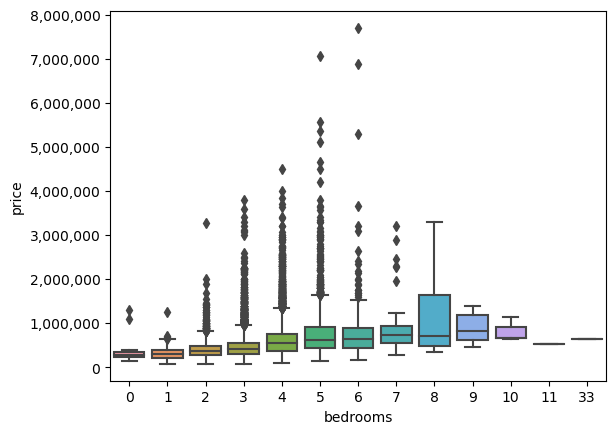

In [6]:
# Create the boxplot
ax = sns.boxplot(data=df, x='bedrooms', y='price')

# Format the y-axis ticks
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Show the plot
plt.show()

In [ ]:
df.columns

In [7]:
X_with_price = df[['bedrooms','price', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15', 'year',
       'month', 'day']]

In [8]:
X_with_price.head()

,bedrooms,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,sqft_living15,sqft_lot15,year,month,day
0,3,221900.00000,1.00000,1180,5650,1.00000,0,0,3,7,1955,0,1340,5650,2014,10,13
1,3,538000.00000,2.25000,2570,7242,2.00000,0,0,3,7,1951,1991,1690,7639,2014,12,9
2,2,180000.00000,1.00000,770,10000,1.00000,0,0,3,6,1933,0,2720,8062,2015,2,25
3,4,604000.00000,3.00000,1960,5000,1.00000,0,0,5,7,1965,0,1360,5000,2014,12,9
4,3,510000.00000,2.00000,1680,8080,1.00000,0,0,3,8,1987,0,1800,7503,2015,2,18


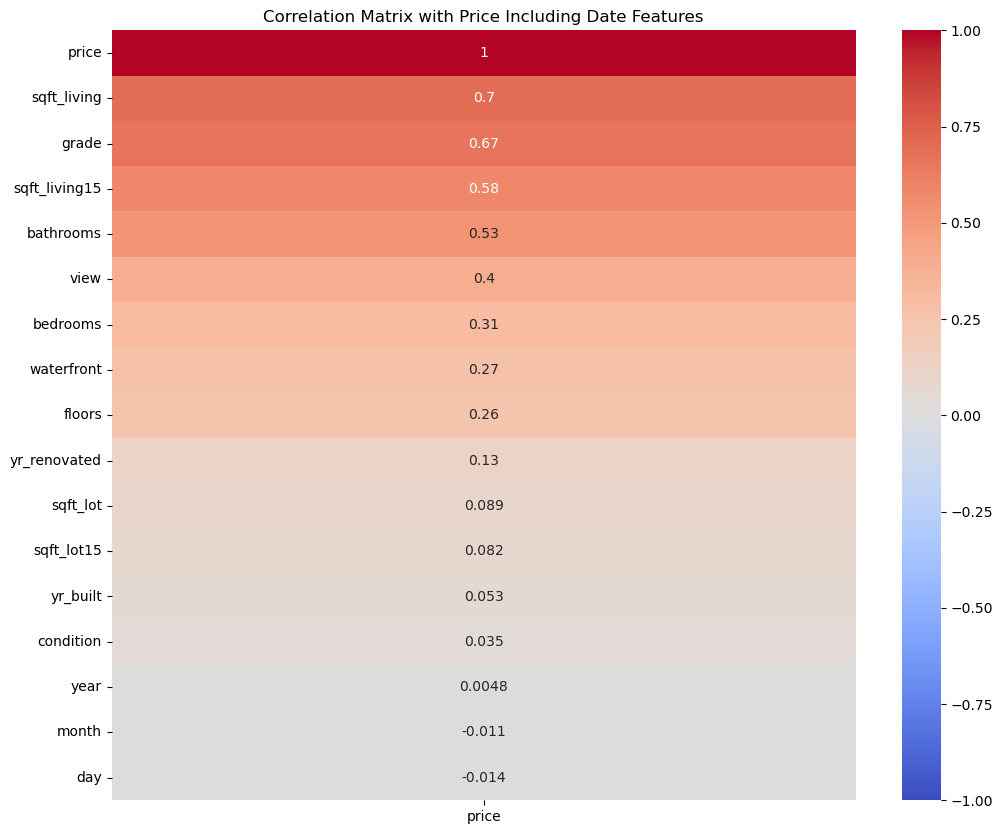

In [9]:
corr_matrix = X_with_price.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix[['price']].sort_values(by='price', ascending=False), 
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix with Price Including Date Features')
plt.show()

## Baseline Model

In [10]:
#split dataset into X, y

X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_living15', 'sqft_lot15', 'year',
        ]]

y = df['price']



In [11]:
# split data into train, test and validation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True)

In [12]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)
print("Mean apt price:", y_mean)

print("Baseline MAE:", mean_absolute_error(y_train, y_pred_baseline))

mse = mean_squared_error(y_train, y_pred_baseline)
rmse = np.sqrt(mse)
print(f"Baseline RMSE: {rmse}")

Mean apt price: 543574.0311625303
Baseline MAE: 236561.99763031618
Baseline RMSE: 373950.3633915845


### Normalize data (Standardization)

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [14]:
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [ ]:
X_train_sc

## Model Training

In [15]:
lr = LinearRegression()
lr.fit(X_train_sc, y_train)

LinearRegression()

In [16]:
y_pred=lr.predict(X_train_sc)

In [ ]:
y_pred

In [ ]:
y_test 

In [ ]:
y_test

In [20]:
mean_absolute_error(y_train, y_pred)
print("Intercept:" ,lr.intercept_)
print("R^2 Score :" ,lr.score(X_train_sc, y_train))

Intercept: 543574.031162531
R^2 Score : 0.6110593181125044


In [ ]:
#split data into train, test and validation

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [ ]:
# Split the data into training, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.5, random_state=42)

In [ ]:
# Create a linear regression model
model = LinearRegression()

# Combine the training and validation sets for cross-validation
X_train_val = np.concatenate((X_train, X_val))
y_train_val = np.concatenate((y_train, y_val))

In [ ]:
y_mean = y_train_val.mean()
y_pred_baseline = [y_mean] * len(y_train_val)
print("Mean apt price:", y_mean)

print("Baseline MAE:", mean_absolute_error(y_train_val, y_pred_baseline))

In [ ]:
# Perform cross-validation on the combined training and validation sets
cv_scores = cross_val_score(model, X_train_val, y_train_val, cv=5)  # cv=5 for 5-fold cross-validation

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean cross-validation score
mean_cv_score = cv_scores.mean()
print("Mean cross-validation score:", mean_cv_score)

# Train the model on the combined training and validation sets
model.fit(X_train_val, y_train_val)

# Evaluate the model on the test set
test_score = model.score(X_test, y_test)
print("Test R^2 score:", test_score)


In [ ]:
# Split the data into training, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.5, random_state=42)

# Combine the training and validation sets for cross-validation
X_train_val_combined = np.concatenate((X_train, X_val))
y_train_val_combined = np.concatenate((y_train, y_val))

# Create a Ridge regression model
ridge_model = Ridge()

# Perform cross-validation on the combined training and validation sets
cv_scores = cross_val_score(ridge_model, X_train_val_combined, y_train_val_combined, cv=5)  # cv=5 for 5-fold cross-validation

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean cross-validation score
mean_cv_score = cv_scores.mean()
print("Mean cross-validation score:", mean_cv_score)

# Train the Ridge model on the combined training and validation sets
ridge_model.fit(X_train_val_combined, y_train_val_combined)

# Evaluate the Ridge model on the test set
test_score = ridge_model.score(X_test, y_test)
print("Test R^2 score:", test_score)

In [ ]:
# Split the data into training, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Combine the training and validation sets for cross-validation
X_train_val_combined = np.concatenate((X_train, X_val))
y_train_val_combined = np.concatenate((y_train, y_val))

# Create a Ridge regression model
lasso_model = Lasso()

# Perform cross-validation on the combined training and validation sets
cv_scores = cross_val_score(lasso_model, X_train_val_combined, y_train_val_combined, cv=5)  # cv=5 for 5-fold cross-validation

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean cross-validation score
mean_cv_score = cv_scores.mean()
print("Mean cross-validation score:", mean_cv_score)

# Train the Ridge model on the combined training and validation sets
lasso_model.fit(X_train_val_combined, y_train_val_combined)

# Evaluate the Ridge model on the test set
test_score = lasso_model.score(X_test, y_test)
print("Test R^2 score:", test_score)

In [ ]:

# Split the data into training, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Combine the training and validation sets for cross-validation
X_train_val_combined = np.concatenate((X_train, X_val))
y_train_val_combined = np.concatenate((y_train, y_val))

# Create a Gradient Boosting regression model
gb_model = GradientBoostingRegressor()

# Perform cross-validation on the combined training and validation sets
cv_scores = cross_val_score(gb_model, X_train_val_combined, y_train_val_combined, cv=5, scoring='r2')  # cv=5 for 5-fold cross-validation

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean cross-validation score
mean_cv_score = cv_scores.mean()
print("Mean cross-validation score:", mean_cv_score)

# Train the Gradient Boosting model on the combined training and validation sets
gb_model.fit(X_train_val_combined, y_train_val_combined)

# Evaluate the Gradient Boosting model on the test set
test_score = gb_model.score(X_test, y_test)
print("Test R^2 score:", test_score)


In [ ]:
# Gradient boost and grid search
# Define the parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.001, 0.1]
}

# Create a Gradient Boosting regression model
gb_model = GradientBoostingRegressor()

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='r2')

# Fit the model to the combined training and validation data
grid_search.fit(X_train_val_combined, y_train_val_combined)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best R^2 score:", best_score)

# Train the Gradient Boosting model with the best parameters
best_gb_model = GradientBoostingRegressor(**best_params)
best_gb_model.fit(X_train_val_combined, y_train_val_combined)

# Evaluate the Gradient Boosting model on the test set
test_score = best_gb_model.score(X_test, y_test)
print("Test R^2 score:", test_score)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Train the Gradient Boosting model
gb_reg = GradientBoostingRegressor(learning_rate=0.05, max_depth=5, n_estimators=150)
gb_reg.fit(X_train, y_train)

# Predict on training, test, and validation sets
y_train_pred = gb_reg.predict(X_train)
y_test_pred = gb_reg.predict(X_test)
y_val_pred = gb_reg.predict(X_val)

# Calculate R^2 scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
r2_val = r2_score(y_val, y_val_pred)

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(y_train, label='Actual (Train)', color='blue')
plt.plot(y_train_pred, label='Predicted (Train)', linestyle='--', color='blue')
plt.plot(y_test, label='Actual (Test)', color='green')
plt.plot(y_test_pred, label='Predicted (Test)', linestyle='--', color='green')
plt.plot(y_val, label='Actual (Validation)', color='red')
plt.plot(y_val_pred, label='Predicted (Validation)', linestyle='--', color='red')
plt.title('Gradient Boosting Model Performance')
plt.xlabel('Samples')
plt.ylabel('Target Value')
plt.legend()
plt.show()

print(f"Training R^2 score: {r2_train:.4f}")
print(f"Test R^2 score: {r2_test:.4f}")
print(f"Validation R^2 score: {r2_val:.4f}")


In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import r2_score

# Train the XGBoost model
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', 
                           learning_rate = 0.05,
                           max_depth = 5,
                           n_estimators = 150)
xg_reg.fit(X_train, y_train)

# Predict on training, test, and validation sets
y_train_pred = xg_reg.predict(X_train)
y_test_pred = xg_reg.predict(X_test)
y_val_pred = xg_reg.predict(X_val)

# Calculate R^2 scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
r2_val = r2_score(y_val, y_val_pred)

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(y_train, label='Actual (Train)', color='blue')
plt.plot(y_train_pred, label='Predicted (Train)', linestyle='--', color='blue')
plt.plot(y_test, label='Actual (Test)', color='green')
plt.plot(y_test_pred, label='Predicted (Test)', linestyle='--', color='green')
plt.plot(y_val, label='Actual (Validation)', color='red')
plt.plot(y_val_pred, label='Predicted (Validation)', linestyle='--', color='red')
plt.title('XGBoost Model Performance')
plt.xlabel('Samples')
plt.ylabel('Target Value')
plt.legend()
plt.show()

print(f"Training R^2 score: {r2_train:.4f}")
print(f"Test R^2 score: {r2_test:.4f}")
print(f"Validation R^2 score: {r2_val:.4f}")
